In [1]:
import json
import pandas as pd

In [2]:
with open('../subset/subset.json') as f:
    data = json.load(f)

In [3]:
def get_docs_from_id(id):
    docs = []
    for o in data:
        if o['document_type_id'] == id:
            docs.append(o)
    return docs

datas = get_docs_from_id(8)
print(len(datas))

70


In [4]:
import json
from PIL import Image, ImageDraw, ImageFont
from matplotlib import pyplot as plt

def get_font_size(text, font_path, desired_width):
    min_size, max_size = 7, 40  # reasonable range for fontsize
    while max_size - min_size > 1:
        font_size = (min_size + max_size) // 2
        font = ImageFont.truetype(font_path, font_size)
        if font.getsize(text)[0] > desired_width:
            max_size = font_size
        else:
            min_size = font_size
    return ImageFont.truetype(font_path, min_size)

/tmp/ipykernel_6078/689991605.py:10: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  if font.getsize(text)[0] > desired_width:


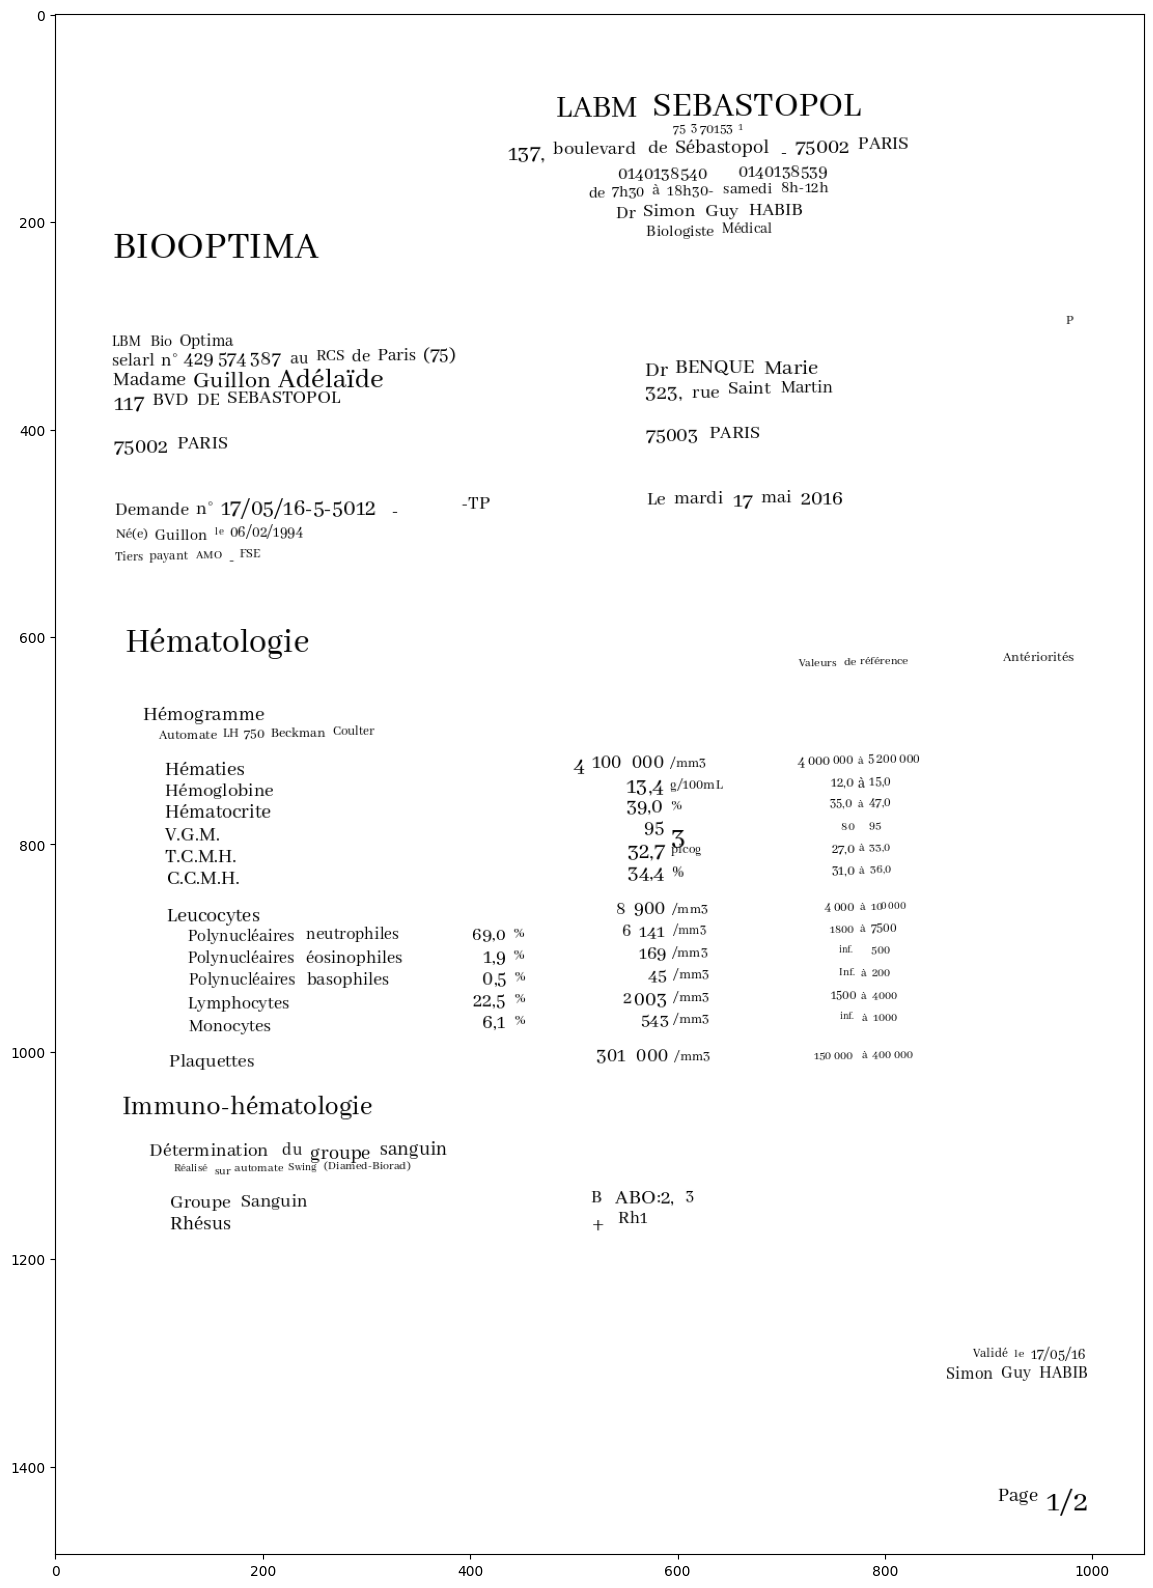

In [5]:
page_0 = datas[35][('0')]
width, height = 210 *5, 297*5

####
# put the following code in an other cell to not reload full dataset each time
####
# path of .ttf
font_path = "../AbhayaLibre-Regular.ttf"


# create a new image with white background
blank_image = Image.new('RGB', (width, height), 'white')
# get a drawing context
d = ImageDraw.Draw(blank_image)
for line in page_0:
    if line['line']['confidence'] > 50:
        for word in line['line']['words']:
            (x, y, w, h) = (word['left']*width, word['top']*height, word['width']*width, word['height']*height)
            text = word["text"]
            d.text((x, y), text, font=get_font_size(text, font_path, w), fill=(0, 0, 0))

# can locally save the page with following line:
# blank_image.save("output_image.png")
plt.figure(figsize=(40,20))
plt.imshow(blank_image)